#### 활성화(Activation) 함수
1. 시그모이드(sigmoid)
2. 소프트맥스(softmax)
3. 계단(step) - perceptron에서 사용
4. 선형(linear)

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.,1.,2.])

In [2]:
#!pip install python-mnist
from mnist import MNIST

In [3]:
#step function
def step1(x):
    return np.where(x>0,1,0)

In [4]:
def step2(x):
    y = x > 0
    return y.astype(np.int32)

In [5]:
def step3(x):
    return np.array(x>0,dtype=np.int32)

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def relu(x):
    return np.maximum(0,x)

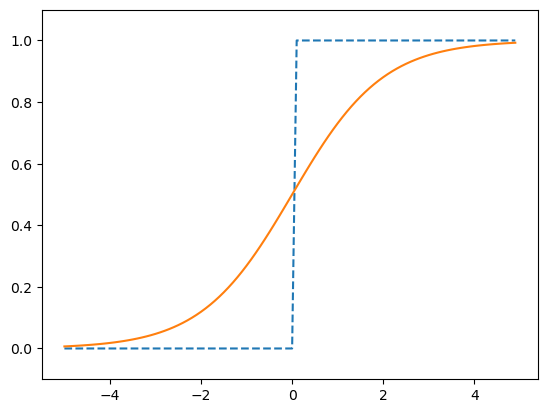

In [8]:
x=np.arange(-5.,5.,0.1)
y=step3(x)
z=sigmoid(x)
plt.plot(x,y,'--',label='step')
plt.plot(x,z,label='sigmoid')
plt.ylim(-0.1,1.1)
plt.show()

#### 3Layer NeuralNetwork

In [9]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3

    return a3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


In [10]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x/sum_exp_x
    
    return y

In [11]:
mndata = MNIST('./mnist')
train_img, train_lbl = mndata.load_training()
test_img, test_lbl = mndata.load_testing()

In [12]:
train_images = np.array(train_img).reshape((-1, 28, 28))
train_labels = np.array(train_lbl)
test_images = np.array(test_img).reshape((-1, 28, 28))
test_labels = np.array(test_lbl)

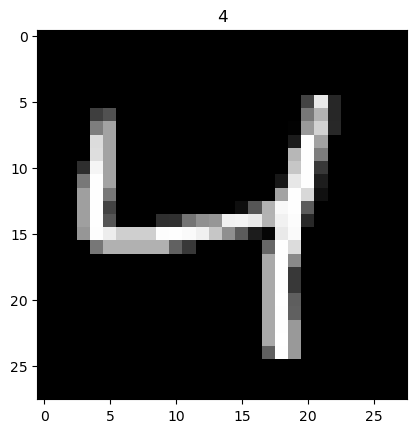

In [15]:
idx = 0

plt.title(train_labels[2])
plt.imshow(train_images[2], cmap='gray')
plt.show()